# Week 11

Tensors

In [1]:
!wget -q https://github.com/DM-GY-9103-2024F-H/9103-utils/raw/main/src/data_utils.py
!wget -q https://github.com/DM-GY-9103-2024F-H/9103-utils/raw/main/src/image_utils.py

In [2]:
import torch
import matplotlib.pyplot as plt

from torch import Tensor

from image_utils import open_image, make_image

## Tensors

We'll be using the [PyTorch](https://pytorch.org/) library for working with Neural Networks.

Before we start building, training, tuning models, we have to learn a little bit about [Tensors](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html)!

<img src="./imgs/tensors.jpg" width="600px"/>

Tensor is a fancy word for multi-dimensional list. They are very much like lists, where they keep a sequence of number values, or a sequence of other tensors. They are a little bit more picky than lists because they require all members to be of the same _type_ (all integers, or all floats, etc), and they don't like having inner lists of different lengths.

PyTorch tensors are optimized for doing neural network operations, and so they come with a few extra capabilities beyond `sum()`, `sort()`, `mean()`, etc.

Let's start by importing them, and taking a look at how to work with multi-dimensional tensors:

### Loading and Shaping

Let's open up an image and load its pixels into a tensor.

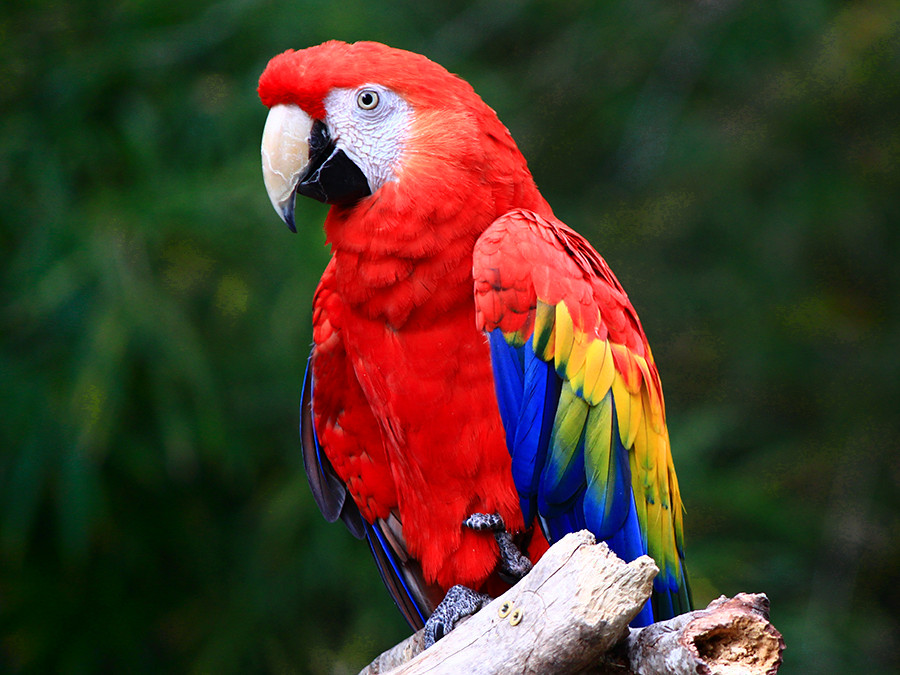

[(12, 37, 8), (11, 38, 7), (9, 39, 5), (8, 40, 3), (8, 38, 2)]


In [4]:
mimg = open_image("./data/image/arara.jpg")

display(mimg)
print(mimg.pixels[:5])

To make a tensor out of this, we just have to pass the list of pixels to the `Tensor()` constructor.

We can check it's size with the `shape` member variable, and use slicing and indexing like we've always used with lists:

In [5]:
mimg_t = Tensor(mimg.pixels)
mimg_t.shape, mimg_t[:5], mimg_t[5], mimg_t[5][0]

(torch.Size([607500, 3]),
 tensor([[12., 37.,  8.],
         [11., 38.,  7.],
         [ 9., 39.,  5.],
         [ 8., 40.,  3.],
         [ 8., 38.,  2.]]),
 tensor([11., 37.,  2.]),
 tensor(11.))

The shape of this tensor is $607\text{,}500 \times 3$, meaning that we have $607\text{,}500$ pixels and each pixel has $3$ color values.

Let's reshape the tensor so it's more representative of our image's dimensions. We want to have a tensor of shape $h \times w \times 3$, where $h$ and $w$ are the images `height` and `width` dimensions.

The `reshape()` function does just this, we just have to pass the parameters in the right order.

In [6]:
mimg_t = Tensor(mimg.pixels).reshape(mimg.size[1], mimg.size[0], 3)

mimg_t.shape, mimg_t[:5].shape, mimg_t[:5], mimg_t[0][5], mimg_t[0, 5]

(torch.Size([675, 900, 3]),
 torch.Size([5, 900, 3]),
 tensor([[[12., 37.,  8.],
          [11., 38.,  7.],
          [ 9., 39.,  5.],
          ...,
          [50., 65., 22.],
          [50., 67., 23.],
          [48., 70., 24.]],
 
         [[16., 34., 10.],
          [15., 35., 10.],
          [12., 37.,  8.],
          ...,
          [54., 70., 25.],
          [53., 71., 23.],
          [53., 73., 24.]],
 
         [[20., 33., 15.],
          [17., 35., 13.],
          [13., 35., 12.],
          ...,
          [57., 71., 20.],
          [55., 72., 20.],
          [54., 72., 20.]],
 
         [[18., 36., 14.],
          [17., 36., 14.],
          [13., 37., 13.],
          ...,
          [57., 71., 18.],
          [57., 71., 18.],
          [55., 72., 17.]],
 
         [[11., 40., 10.],
          [10., 39.,  9.],
          [10., 39.,  9.],
          ...,
          [59., 74., 19.],
          [59., 74., 19.],
          [57., 74., 19.]]]),
 tensor([11., 37.,  2.]),
 tensor([11., 37.,  

Now `mimg_t[:5]` doesn't refer to first $5$ pixels anymore, but to the first $5$ rows of our image.

To get the first $5$ pixels we can use `mimg_t[0][:5]` or `mimg_t[0, :5]`.

New syntax! : We can use multiple numbers inside the square brackets, separated with a comma.

In [7]:
mimg_t[0][:5], mimg_t[0, :5]

(tensor([[12., 37.,  8.],
         [11., 38.,  7.],
         [ 9., 39.,  5.],
         [ 8., 40.,  3.],
         [ 8., 38.,  2.]]),
 tensor([[12., 37.,  8.],
         [11., 38.,  7.],
         [ 9., 39.,  5.],
         [ 8., 40.,  3.],
         [ 8., 38.,  2.]]))

### Slicing

This is where it starts to get fun.

Since we now have our image in a $3D$ tensor, we can use slice in multiple directions, and at the same time.

<img src="./imgs/slicing_00.jpg" width=800px />

#### Getting

For example, if we want to crop a part of the image, we can just get slices in the first two dimensions, like this:

`mimg_t[y0:y1, x0:x1]`

where `x0` and `y0` are the horizontal and vertical location of the top-left pixel of the region we want, and `x1` and `y1` are the bottom-right coordinates of the last pixel we want.

So, to grab a $256$ X $256$ section of an image, starting at $(x,y) = (240, 30)$ we can do:

`mimg_crop = mimg_t[30:30+256, 240:240+256]`

In [8]:
x0,y0 = 240, 30

mimg_crop_t = mimg_t[y0:y0+256, x0:x0+256]

mimg_crop_t.shape, mimg_crop_t[0,:5]

(torch.Size([256, 256, 3]),
 tensor([[17., 49., 25.],
         [19., 53., 26.],
         [20., 55., 25.],
         [18., 55., 22.],
         [18., 55., 21.]]))

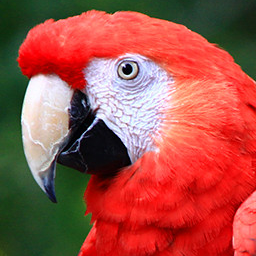

[(17, 49, 25), (19, 53, 26), (20, 55, 25), (18, 55, 22), (18, 55, 21)]

In [9]:
mimg_crop = make_image(mimg_crop_t)
display(mimg_crop)
mimg_crop.pixels[:5]

#### Setting and Broadcasting

Slicing also works when assigning values to regions of our tensor/image.

Even if the values we're assigning don't perfectly match the region we want to assign them to, the tensor will try to _broadcast_ the value into the right places with the right shape.

For example, we can assign a single pixel value to an entire region with:

`mimg_t[y0:y1, x0:x1] = Tensor([220, 20, 120])`

and it knows to set every pixel in that region the same color.

Or, we can even do this, if we want to set a color in grayscale:

`mimg_t[y0:y1, x0:x1] = 220`

it will create a `Tensor([220, 220, 220])` to fill the pixel region specified.

The tensor will convert/broadcast the value into the right shape to fit the region we are slicing.

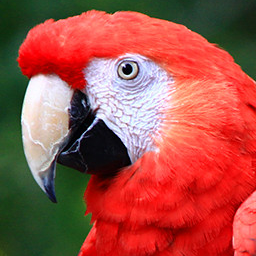

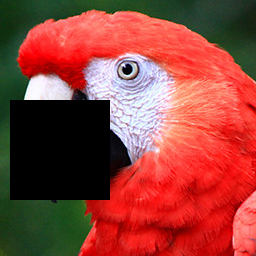

In [10]:
# copy the tensor for editing
mimg_blank_t = mimg_crop_t.clone()
display(make_image(mimg_blank_t))

mimg_blank_t[100:200, 10:110] = 0
display(make_image(mimg_blank_t))

In [18]:
len(mimg_crop.pixels)
print(65536 / 256)
print(256**0.5)

256.0
16.0


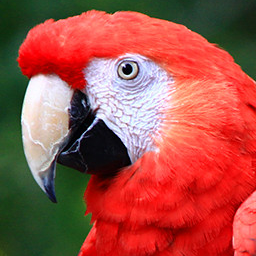

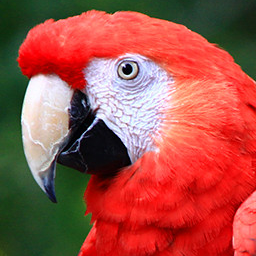

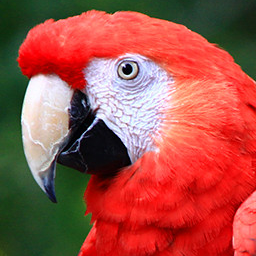

In [23]:
mimg_blank_rows_t = mimg_crop_t.clone()

# TODO: try to assign colors to entire rows/column

mimg_blank_t = mimg_crop_t.clone()
display(make_image(mimg_blank_t))

mimg_blank_t[0:10, 255:40] = 255
display(make_image(mimg_blank_t))

display(make_image(mimg_blank_rows_t))

This multi-dimensional slicing also means that we can separate the color channels of our images using a single line of code, and no looping!

For looking at the `R` channel, just set `G` and `B` to `0`.

```python
mimg_crop_r_t[:, :, 1:3] = 0
```

The `:` in `[:, :, 1:3]` means grab every row and every column. Then `1:3` specifies the second and third channel of each pixel.

In [ ]:
mimg_crop_r_t = mimg_crop_t.clone()
mimg_crop_r_t[:, :, 1:3] = 0

# look at first 5 pixels
mimg_crop_r_t[0, :5]

<img src="https://weeklydevotion.com/wp-content/uploads/2014/06/whoa.jpg" height=200px /> <img src="https://sites.tufts.edu/emotiononthebrain/files/2014/10/tumblr_m0wb2xz9Yh1r08e3p.jpg" height=200px />

In [ ]:
display(make_image(mimg_crop_r_t))

In [ ]:
mimg_crop_g_t = mimg_crop_t.clone()
# TODO: get separate green channel image

mimg_crop_b_t = mimg_crop_t.clone()
# TODO: get separate blue channel image

In [ ]:
display(make_image(mimg_crop_r_t))
display(make_image(mimg_crop_g_t))
display(make_image(mimg_crop_b_t))

#### Slicing in Multiple Dimensions

We can combine slicing regions and slicing specific color channels to create effects with little code.

This creates an image by combining shifted versions of the separate `R`, `G` and `B` channel images from above:

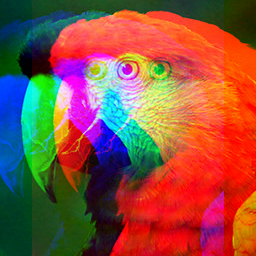

In [24]:
# create an image the same shape as the original image, but with all 0s

#makes a copy
mimg_crop_rgb_t = mimg_crop_t.clone()
mimg_crop_rgb_t[:] = 0

# left side is desttination 
# first colon says grab all rows
# 32 starts with column (in red channel)
mimg_crop_rgb_t[:, 32:, 0] += mimg_crop_t[:, :-32, 0]
mimg_crop_rgb_t[:, :, 1] += mimg_crop_t[:, :, 1]
mimg_crop_rgb_t[:, :-32, 2] += mimg_crop_t[:, 32:, 2]

display(make_image(mimg_crop_rgb_t))

Code like this is not very professional-looking or understandable, but can be fun to write.

Don't worry if this effect isn't completely obvious at first, but try to break down each of the lines and each of the slicing expressions into simpler terms. Like:
- `mimg_crop_rgb_t[:] = 0`: sets all pixels to black, creating a black image with same dimensions as the original
- `mimg_crop_rgb_t[:, 32:, 0]`: from black image, selects all rows, all columns except first $32$, and red channel
- `mimg_crop_t[:, :-32, 0]`: from original image, all rows, all columns except last $32$, and red channel

... etc....

#### Changing Shape

We can also get the individual pixel values for each channel using slicing.

This gets all of the red values of all pixels as a two-dimensional tensor of shape $h$ X $w$:

`mimg_crop_t[:,:,0]`

After this operation, each pixel will only have $1$ channel, so when we display these images they will be grayscale representations of each channel.

In [ ]:
print(mimg_crop_t[:,:,0].shape)
display(make_image(mimg_crop_t[:,:,0]))
display(make_image(mimg_crop_t[:,:,1]))
display(make_image(mimg_crop_t[:,:,2]))

### Operations along specific dimensions

Just like `DataFrames`, `Tensor` objects also have a bunch of built-in functions for performing common operations on their content.

Functions like, `sum()`, `mean()`, `max()`, `std()`, should be familiar:

In [ ]:
my_t = Tensor([[1, 2], [2, 4], [-2, -1]])
print(my_t)
print(my_t.sum(), my_t.mean(), my_t.max(), my_t.std())

With `DataFrames` a lot of these functions would happen along columns, so we would get the `mean`, `max`, `sum` of each of the features in the dataset.

By default our `Tensor` performs these operations on all of its data and returns one value.

We can change this behavior by providing an extra argument to the functions, specifying the dimension along which we want to perform the operation. It helps to think of this parameter as the dimension we want to "_reduce_", or remove.

So, for example, `sum(0)` gets rid of the rows, by summing down the `Tensor` columns, while `mean(1)`, gets rid of the columns, by computing the average value of the `Tensor` rows.

In [ ]:
print(my_t)
print(my_t.sum(0), my_t.mean(1))

What this means is that we can convert our image to grayscale in one line of code by reducing the $3^{rd}$ dimension, which holds the color values for each pixel.

In [ ]:
mimg_crop_gs_t = mimg_crop_t.mean(2)
display(make_image(mimg_crop_gs_t))

### Filtering with Boolean Indexes

We can also select certain elements, regions, or dimensions of our tensors using boolean tensors.

Instead of passing numeric indexes, or slices, to our tensor's square brackets, we can select elements by passing a tensor of similar shape, but whose contents are `True`/`False` values.

This works for setting and getting elements.

The easiest way to create these boolean selector tensors is usually by manipulating the original tensor.

The following line of code creates a two-dimensional tensor whose element are the difference between the `R` and `G` channels of our image:

`(mimg_crop_t[:,:,0] - mimg_crop_t[:,:,1])`

It's first two dimensions are just like the original `mimg_crop_t`'s shape, but the last dimension holds a single value, and not a pixel value list.

In [ ]:
mimg_rg_diff_t = mimg_crop_t[:,:,0] - mimg_crop_t[:,:,1]

print(mimg_rg_diff_t)
print(mimg_rg_diff_t.shape)

This line creates a boolean tensor, whose values specify whether the `R` channel value is larger than the `G` channel value by more than $80$, for every pixel in the image:

`((mimg_crop_t[:,:,0] - mimg_crop_t[:,:,1]) > 80)`

It holds boolean values.

In [ ]:
mimg_rg_diff_thold_t = (mimg_crop_t[:,:,0] - mimg_crop_t[:,:,1]) > 80

print(mimg_rg_diff_thold_t)
print(mimg_rg_diff_thold_t.shape)

We could now use this indexing `Tensor` to select only those pixels from the original image and multiple them by the one-dimensional tensor `[4, 1, 1]` to exaggerate their `R` channel values by a factor of $4$, while keeping `G` and `B` intact:

In [ ]:
mimg_red_bool_t = mimg_crop_t.clone()

rgtg_idx = ((mimg_crop_t[:,:,0] - mimg_crop_t[:,:,1]) > 80)
mimg_red_bool_t[rgtg_idx] *= Tensor([4, 1, 1])

display(make_image(mimg_red_bool_t))

#### More Filtering

Before running the cells... try to work out what the following indexing, selecting, slicing, assignments do.

We're going to be writing, but also reading, lots of code with some pretty intense, non-professional looking, `Tensor` operations.

In [ ]:
# what does this do?
rgtg_idx = (mimg_crop_t[:,:,0] - mimg_crop_t[:,:,1]) > 80

# what about this?
rgtb_idx = (mimg_crop_t[:,:,0] - mimg_crop_t[:,:,2]) > 80

# and these ?
red_idx = rgtg_idx & rgtb_idx
not_red_idx = ~red_idx

In [ ]:
mimg_idx_bool_t = mimg_crop_t.clone()
mimg_idx_bool_t[not_red_idx] = 0

display(make_image(mimg_idx_bool_t))

In [ ]:
# what do these 2 lines do?
mimg_blank_t = mimg_crop_t.clone()
mimg_blank_t[:] = 0

# how is this cell different from the 2 previous ones?
mimg_blank_t[red_idx] = mimg_crop_t[red_idx]

display(make_image(mimg_blank_t))

And these?

In [ ]:
# what does this cell do that is different from the grayscale filter above?
mimg_crop_gs_t = mimg_crop_t.mean(2)

mimg_crop_rgb_gs_t = mimg_crop_t.clone()
mimg_crop_rgb_gs_t[:,:,0] = mimg_crop_gs_t
mimg_crop_rgb_gs_t[:,:,1] = mimg_crop_gs_t
mimg_crop_rgb_gs_t[:,:,2] = mimg_crop_gs_t

In [ ]:
mimg_gs_bool_t = mimg_crop_t.clone()

# what does this do?
mimg_gs_bool_t[not_red_idx] = mimg_crop_rgb_gs_t[not_red_idx]

display(make_image(mimg_gs_bool_t))

## More Tensors and Why They're Awesome

Multi-dimensional slicing is definitely a nice property of tensors, but what really sets them apart from fancy lists is their ability to keep track of all the operations performed on them using _computational graphs_.

If we define a tensor and set its `requires_grad` parameter to `True` we unlock some really nice properties that we can use for training neural networks.

One of these properties is the ability to automatically calculate derivatives (OMG, calculus!) of functions defined in terms of our tensor.

Let's investigate.

### Easy Calculus and Free Derivatives

Let's pretend we have the following function:

$f(x) = x^4 - 0.7x^3 - 2x^2 + x + 1$

And we want to find out when the function achieves its maximum and minimum values, when it equals $0$, or when it equals $0.5$.

We can plot it, and easily approximate those values visually:

In [ ]:
def peaks(x):
  return x**4 - 0.7*x**3 - 2*x**2 + x + 1

In [ ]:
# linspace is range()'s cousin, but for floats 
#   and where the 3rd argument specifies number of steps, not length of steps

x = torch.linspace(-1.3, 1.6, 300)
y = peaks(x)

plt.plot(x, y)
plt.plot([-1.3, 1.6], [0,0], '-')
plt.plot([-1.3, 1.6], [0.5, 0.5], '-')
plt.show()

Looks like local minimum and maximum values are approximately:
- $x = -0.9$ (global minimum)
- $x = 0.2$ (global maximum)
- $x = 1.2$ (local minimum)

It crosses $y = 0$ at:
- $x = -1.2$
- $x = -0.6$

And, it crosses $y=0.5$ a bunch of times, so we'll look at that later.

We can calculate exact values for these points in our graph if we define $x$ and $y$ as tensors and enable their `auto_grad` functionality.

In [ ]:
xt = torch.linspace(-1.3, 1.6, 8000, requires_grad=True)
yt = peaks(xt)
yt.backward(torch.ones_like(xt))

dydx = xt.grad
print("derivatives:", dydx[:5])

minmax_idx = (dydx.abs() < 9e-4)
minmax_y = yt[minmax_idx]
minmax_x = xt[minmax_idx]

plt.plot(x, y)
plt.plot(minmax_x.tolist(), minmax_y.tolist(), 'o')
plt.show()

print("min/max:", minmax_x, minmax_y)

### Wait. What?

Let's look at the individual commands from the cell above.

`xt`: this is a $1D$ tensor of shape $8000$ with value from $-1.3$ to $1.6$.

`yt`: this is a $1D$ tensor of shape $8000$ which holds the results of calling `peaks()` on every value of `xt`.

`yt.backwards(torch.ones_like(xt))`: this calculates the derivatives (slope) of the equation `peak()` for every point of `yt` and `xt`. The `torch.ones_like(xt)` parameter is a bit unconventional and usually we'll just call `backwards()` without any parameters. It's necessary here because instead of asking for the derivative of an equation at one specific point, we want to get the derivatives for all points in our `xt` range tensor.

`dydx = xt.grad`: after calling `backward()` on a tensor (`yt`) that depends on tensors with `requires_grad` (`xt`), the tensors with `requires_grad` will have their gradients/slope store in the `grad` member variable.

`minmax_idx = (dydx.abs() < 9e-4)`: since our function is being evaluated on a discrete set of values inside `xt`, we might not have the exact `xt` that gives an exact slope of $0$, so `dydx.abs() < 9e-4` is a boolean indexing of all values of dydx that are really close to $0$.

`minmax_y = yt[minmax_idx]` and `minmax_x = xt[minmax_idx]`: this gets the actual `x` and `y` values where the slope of `peaks()` is really really close to $0$.

### Finding Zero

We found `x` and `y` values for when our `peaks()` function is at its `max` and `min` values.

If we want to find when our function is $0$ we can use a little trick and just square it. This will turn any $0$ crossing into a min, and we can repeat the same process as above.

`yt = peaks(xt).pow(2)`: this squares our function, so _y-axis_ crossings become minimum values.

`zeros_idx = ((dydx.abs() < 0.005) & (yt < 1e-7))`: we add an extra condition to the boolean index, so we only plot the minimum values where the derivate is $0$ and `yt` is close to $0$.

In [ ]:
xt = torch.linspace(-1.3, 1.6, 8000, requires_grad=True)
yt = peaks(xt).pow(2)
yt.backward(torch.ones_like(xt))

dydx = xt.grad
print("derivatives:", dydx[:5])

zeros_idx = ((dydx.abs() < 0.005) & (yt < 1e-7))
zeros_x = xt[zeros_idx]
zeros_y = yt[zeros_idx]

plt.plot(x, y)
plt.plot(zeros_x.tolist(), zeros_y.tolist(), 'o')
plt.show()

print("zeros:", zeros_x, zeros_y)

### Finding other values

If we want to find what values of `xt` give a specific value for `yt` we can use a similar trick.

We shift the function up or down to make that `yt` value become $0$, then square the function and repeat the steps as above.

For example, to find values of `xt` that make `peaks()` equal to $0.5$, we subtract $0.5$ and square `peaks()`.

`yt2 = yt.subtract(0.5).pow(2)`: this is the function we use to take the derivative now.

In [ ]:
xt = torch.linspace(-1.3, 1.6, 8000, requires_grad=True)
yt = peaks(xt)
yt2 = yt.subtract(0.5).pow(2)
yt2.backward(torch.ones_like(xt))

dydx = xt.grad
print("derivatives:", dydx[:5])

y05_idx = ((dydx.abs() < 0.005) & (yt2 < 2e-7))
y05_x = xt[y05_idx]
y05_y = yt[y05_idx]

plt.plot(x, y)
plt.plot(y05_x.tolist(), y05_y.tolist(), 'o')
plt.show()

print("y=0.5:", y05_x, y05_y)

### Solving for min/max iteratively

Our `peaks()` function is pretty simple, as it only depends on one variable, `x`, and the range we're calculating it over is pretty small, $[-1.2, 1.6]$.

What if our `peaks()` function was more complex and it took minutes to calculate? How can we find its `min` or `max` values?

This is the more common case for `grad` and `backward()`. We evaluate a function once, at one specific input value, and calculate which direction it should move in order to increase or decrease the value of our function.

We can use the `peaks()` function to illustrate. Let's calculate the value of `x` that gives the smallest value for `peaks(x)`.

`xm`: this is the current guess for the value of `x` which gives the smallest value for `peaks()`. We'll initialize it at $0.15$, which is the halfway point of our `x` range.

`xms` and `yms`: these will hold the progression of the `xm` and `ym` variables as they move towards their objectives.

`ym`: the value of `peaks()` at the current `xm`.

`backwards()`: calculate the slope of `ym` with respect to its inputs.

`xm = xm + 0.1 * xm.grad`: update `xm` according to the slope of `peaks()` at `xm`. If the slope is positive, decrease `xm`, if the slope is negative, increase `xm`. This will move `x_m` towards a minimum value of `peaks()`. If we wanted to move towards a maximum value, we increase `xm` for positive slopes and decrease it for negative slopes.

The $0.1$ factor determines how big our steps should be when we update `xm`. There's a tradeoff here: large steps can get to the desired value quicker, but can also totally skip the desired value and end up in some non-desired part of our equation. Small steps, on the other hand, take a little longer to find the objective, but usually converge on the correct value.

`xm.retain_grad()`: again, we're using tensors for educational purposes here, and accumulating gradients in an unconventional way. We have to call this to make sure we can later access the gradient of something that was itself calculated from a gradient. This won't be like this in actual modeling code.

A tensor's `item()` member function just returns that tensor's value as a regular `Python` number. Similarly, if we want to get a tensor as a regular `Python` list we can call its `tolist()` function.

In [ ]:
xs = []
ys = []

xm = torch.tensor(0.15, requires_grad=True)

ym = peaks(xm)
ym.backward()
print(xm.item(), ym.item(), xm.grad)

xs.append(xm.item())
ys.append(ym.item())

xm = xm - 0.1 * xm.grad
xm.retain_grad()

ym = peaks(xm)
ym.backward()
print(xm.item(), ym.item(), xm.grad)

xs.append(xm.item())
ys.append(ym.item())

# TODO: more steps

### X's journey

We saved all of the intermediate values of `xm` and `ym` so we can plot them here:

In [ ]:
plt.plot(x, y)
plt.scatter(xs, ys, marker='o', s=14, c='r')
plt.show()
xs[-1], ys[-1]

### Taking all the steps

We took one step. We could loop and take $10$ steps, or take as many steps as are necessary to get to the closest max/min value of our function.

Let's add a loop to the cell above that repeats the following:

- calculate `ym`
- save `xm` and `ym`
- calculate `gradient`
- update `xm`
- repeat